### **Mini Batch and Batch Size**

데이터가 매우 많을 때는 경사 하강법 수행 시 매우 많은 계산량이 필요함

때문에 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념이 나옴

이를 미니 배치라고 함

여기서 미니 배치의 크기를 배치 사이즈라고 하는데

배치 크기는 CPU와 GPU의 메모리 수가 2의 배수이므로

2의 제곱수일 경우에 데이터 송수신의 효율을 높일 수 있음

In [1]:
import torch

In [2]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
                             
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

---
### **Iteration**

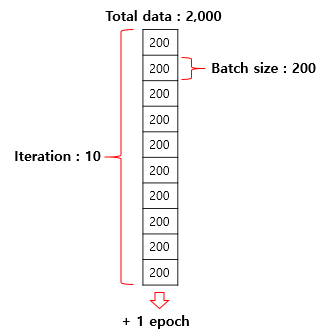

Iteration은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 W와 편향 b의 업데이트 횟수를 뜻함

ex) 전체 데이터가 2000개일 때 배치 사이즈를 200으로 한다면 Iteration의 수는 총 10개임.

즉, 한 번의 에포크 당 매개변수 업데이트가 10번 이루어 짐.

---
### **Data Load**

In [17]:
# 환경 설정

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [18]:
# 데이터

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  

y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [19]:
# dataset

dataset = TensorDataset(x_train, y_train)

In [20]:
# data loader

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [21]:
# optimizer

model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [22]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        print(batch_idx)
        print(samples)
        x_train, y_train = samples

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

0
[tensor([[93., 88., 93.],
        [89., 91., 90.]]), tensor([[185.],
        [180.]])]
Epoch    0/1000 Batch 1/3 Cost: 26036.228516
1
[tensor([[73., 80., 75.],
        [73., 66., 70.]]), tensor([[152.],
        [142.]])]
Epoch    0/1000 Batch 2/3 Cost: 4385.157227
2
[tensor([[ 96.,  98., 100.]]), tensor([[196.]])]
Epoch    0/1000 Batch 3/3 Cost: 3347.996826
0
[tensor([[93., 88., 93.],
        [73., 80., 75.]]), tensor([[185.],
        [152.]])]
Epoch    1/1000 Batch 1/3 Cost: 525.439209
1
[tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]]), tensor([[180.],
        [196.]])]
Epoch    1/1000 Batch 2/3 Cost: 169.219849
2
[tensor([[73., 66., 70.]]), tensor([[142.]])]
Epoch    1/1000 Batch 3/3 Cost: 68.940971
0
[tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]]), tensor([[152.],
        [196.]])]
Epoch    2/1000 Batch 1/3 Cost: 5.947714
1
[tensor([[73., 66., 70.],
        [93., 88., 93.]]), tensor([[142.],
        [185.]])]
Epoch    2/1000 Batch 2/3 Cost: 22.602039
2
[tensor([

In [23]:
# test

# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.9818]], grad_fn=<AddmmBackward0>)


---
### **커스텀 데이터셋으로 선형 회귀 구현**

In [24]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self): # 데이터셋 전처리
        self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    
    def __len__(self): # 데이터셋의 길이(총 샘플의 수수)
        return len(self.x_data)
    
    def __getitem__(self, idx): # 데이터셋에서 특정 1개의 샘플 가져오기
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [25]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [26]:
model = torch.nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [27]:
nb_epochs = 100

for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        
        print(batch_idx)
        print(samples)

        x_train, y_train = samples

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

0
[tensor([[93., 88., 93.],
        [89., 91., 90.]]), tensor([[185.],
        [180.]])]
Epoch    0/100 Batch 1/3 Cost: 38814.722656
1
[tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]]), tensor([[142.],
        [196.]])]
Epoch    0/100 Batch 2/3 Cost: 8815.029297
2
[tensor([[73., 80., 75.]]), tensor([[152.]])]
Epoch    0/100 Batch 3/3 Cost: 2094.153076
0
[tensor([[73., 80., 75.],
        [73., 66., 70.]]), tensor([[152.],
        [142.]])]
Epoch    1/100 Batch 1/3 Cost: 891.882935
1
[tensor([[93., 88., 93.],
        [89., 91., 90.]]), tensor([[185.],
        [180.]])]
Epoch    1/100 Batch 2/3 Cost: 659.469971
2
[tensor([[ 96.,  98., 100.]]), tensor([[196.]])]
Epoch    1/100 Batch 3/3 Cost: 189.849258
0
[tensor([[73., 80., 75.],
        [89., 91., 90.]]), tensor([[152.],
        [180.]])]
Epoch    2/100 Batch 1/3 Cost: 13.750795
1
[tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]]), tensor([[196.],
        [185.]])]
Epoch    2/100 Batch 2/3 Cost: 22.799833
2
[tensor([[73., 

In [28]:
# test

# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.8219]], grad_fn=<AddmmBackward0>)
